In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv("/Users/snehaagrawal/Documents/SEM 2/DSwithPython/Term Project/healthcare-dataset-stroke-data.csv")
data.shape

(5110, 12)

In [12]:
data.head()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
# Handling Categorial data

categorical_columns = ['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type', 'Smoking_Status']

print("Unique Values for Categorical Columns:")
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

Unique Values for Categorical Columns:
Gender: ['Male' 'Female' 'Other']
Ever_Married: ['Yes' 'No']
Work_Type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_Type: ['Urban' 'Rural']
Smoking_Status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [14]:
# Encode 'Ever_Married', 'Gender', and 'Residence_Type' columns (As 2 categories)

label_encoder = LabelEncoder()

data['Ever_Married'] = label_encoder.fit_transform(data['Ever_Married'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Residence_Type'] = label_encoder.fit_transform(data['Residence_Type'])

In [16]:
# One-hot encode 'Work_Type' and 'Smoking_Status' columns (As more than 2 categories)

one_hot_encoder = OneHotEncoder(sparse_output=False)

work_type_encoded = one_hot_encoder.fit_transform(data[['Work_Type']])
work_type_columns = one_hot_encoder.get_feature_names_out(['Work_Type'])
work_type_df = pd.DataFrame(work_type_encoded, columns=work_type_columns)

smoking_status_encoded = one_hot_encoder.fit_transform(data[['Smoking_Status']])
smoking_status_columns = one_hot_encoder.get_feature_names_out(['Smoking_Status'])
smoking_status_df = pd.DataFrame(smoking_status_encoded, columns=smoking_status_columns)

In [17]:
# Attaching the encoded columns with original dataset

data = pd.concat([data, work_type_df, smoking_status_df], axis=1)

# Droping the original 'Work_Type' and 'Smoking_Status' columns

data = data.drop(['Work_Type', 'Smoking_Status'], axis=1)

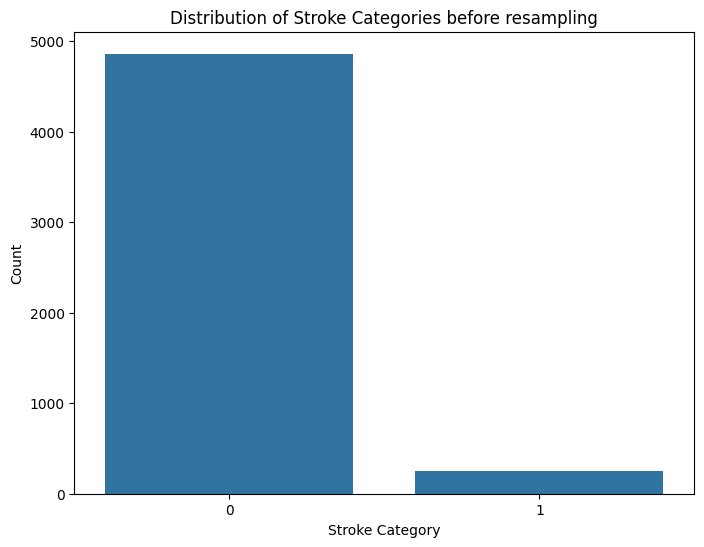

In [19]:
# Target label (Stroke) dustribution

stroke_counts = data['Stroke'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values)
plt.xlabel('Stroke Category')
plt.ylabel('Count')
plt.title('Distribution of Stroke Categories before resampling')
plt.show()

Class distribution after resampling:
Stroke
1    4861
0    4861
Name: count, dtype: int64


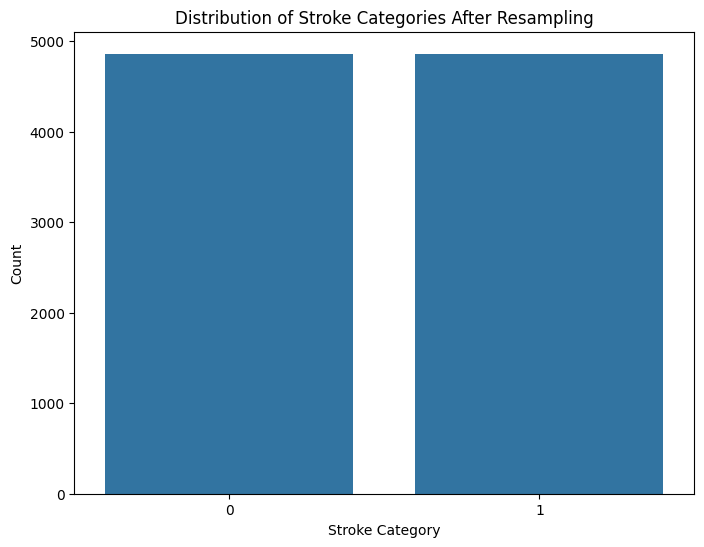

In [20]:
from sklearn.utils import resample

# Separating data into majority and minority classes

stroke_data = data[data['Stroke'] == 1]
non_stroke_data = data[data['Stroke'] == 0]

# Upsample the minority class (stroke cases)

upsampled_stroke_data = resample(stroke_data, 
                                 replace=True,  # Sample with replacement
                                 n_samples=len(non_stroke_data),  # Match the number of majority class samples
                                 random_state=42)  # a random seed for reproducibility

# Combine the upsampled minority class with the majority class

data = pd.concat([upsampled_stroke_data, non_stroke_data])

# Class distribution check after resampling

print("Class distribution after resampling:")
class_distribution = data['Stroke'].value_counts()
print(class_distribution)

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Stroke Category')
plt.ylabel('Count')
plt.title('Distribution of Stroke Categories After Resampling')
plt.show()

In [21]:
# Missing value check

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                                  0
Gender                              0
Age                                 0
Hypertension                        0
Heart_Disease                       0
Ever_Married                        0
Residence_Type                      0
Avg_Glucose_Level                   0
BMI                               972
Stroke                              0
Work_Type_Govt_job                  0
Work_Type_Never_worked              0
Work_Type_Private                   0
Work_Type_Self-employed             0
Work_Type_children                  0
Smoking_Status_Unknown              0
Smoking_Status_formerly smoked      0
Smoking_Status_never smoked         0
Smoking_Status_smokes               0
dtype: int64


In [23]:
# Drop mising data as I do not have weight and height data to calculate BMI value

data = data.dropna()

In [24]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                                0
Gender                            0
Age                               0
Hypertension                      0
Heart_Disease                     0
Ever_Married                      0
Residence_Type                    0
Avg_Glucose_Level                 0
BMI                               0
Stroke                            0
Work_Type_Govt_job                0
Work_Type_Never_worked            0
Work_Type_Private                 0
Work_Type_Self-employed           0
Work_Type_children                0
Smoking_Status_Unknown            0
Smoking_Status_formerly smoked    0
Smoking_Status_never smoked       0
Smoking_Status_smokes             0
dtype: int64


In [26]:
# Rounding off

numeric_columns = ['Age', 'Avg_Glucose_Level', 'BMI']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce').round().astype(int)

In [27]:
# Converting all columns to numeric

data = data.apply(pd.to_numeric)

In [29]:
print("\nPreprocessed Dataset:")
data


Preprocessed Dataset:


,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Residence_Type,Avg_Glucose_Level,BMI,Stroke,Work_Type_Govt_job,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Smoking_Status_Unknown,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
102,45277,0,74,0,0,1,0,232,35,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
179,65105,1,81,0,0,1,1,213,26,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
92,66315,0,57,0,0,0,1,68,38,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14,5317,0,79,0,1,1,1,214,28,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
106,42072,0,50,1,0,1,0,73,30,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13,0,0,0,0,103,19,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5106,44873,0,81,0,0,1,1,125,40,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,19723,0,35,0,0,1,0,83,31,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,1,51,0,0,1,0,166,26,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
                 ID       Gender          Age  Hypertension  Heart_Disease  \
count   8750.000000  8750.000000  8750.000000   8750.000000    8750.000000   
mean   36994.386629     0.416914    53.791657      0.177714       0.114857   
std    21543.008801     0.493308    22.427433      0.382294       0.318868   
min       77.000000     0.000000     0.000000      0.000000       0.000000   
25%    17315.250000     0.000000    39.000000      0.000000       0.000000   
50%    36857.000000     0.000000    58.000000      0.000000       0.000000   
75%    55996.250000     1.000000    73.000000      0.000000       0.000000   
max    72940.000000     2.000000    82.000000      1.000000       1.000000   

       Ever_Married  Residence_Type  Avg_Glucose_Level          BMI  \
count   8750.000000     8750.000000        8750.000000  8750.000000   
mean       0.756686        0.513943         117.800343    29.501143   
std        0.429108        0.499834          54.801378     7.2


Correlation Analysis:
Stroke                            1.000000
Age                               0.577922
Ever_Married                      0.287611
Avg_Glucose_Level                 0.271293
Hypertension                      0.266370
Heart_Disease                     0.242129
Work_Type_Self-employed           0.126320
Smoking_Status_formerly smoked    0.118575
BMI                               0.101426
Smoking_Status_smokes             0.055843
Smoking_Status_never smoked       0.033428
Work_Type_Private                 0.028022
Work_Type_Govt_job                0.019591
Gender                            0.016494
Residence_Type                    0.015836
ID                               -0.002426
Work_Type_Never_worked           -0.046605
Smoking_Status_Unknown           -0.203317
Work_Type_children               -0.255221
Name: Stroke, dtype: float64


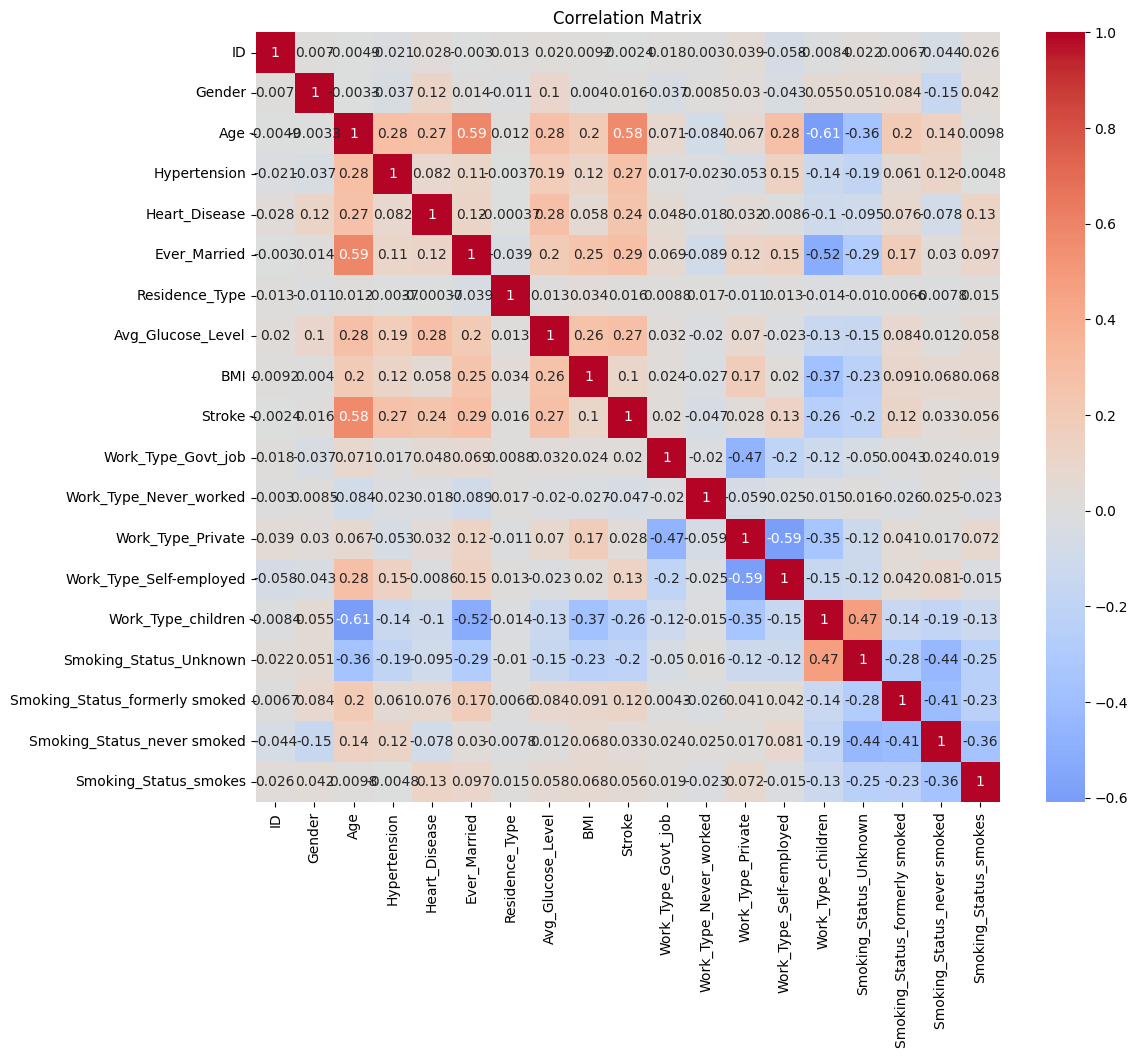

In [31]:
# Correlation Analysis

print("\nCorrelation Analysis:")
correlation = data.corr()
print(correlation['Stroke'].sort_values(ascending=False))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

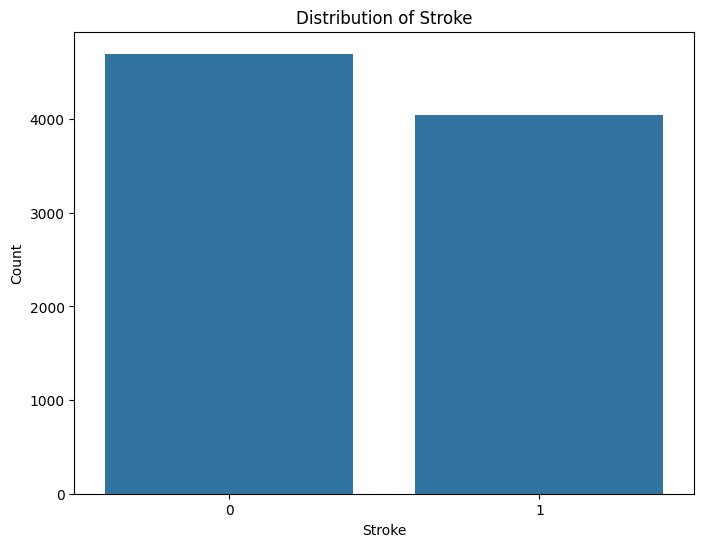

In [32]:
# Distribution of Stroke (Reduced as removed missing data columns)

plt.figure(figsize=(8, 6))
sns.countplot(x='Stroke', data=data)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

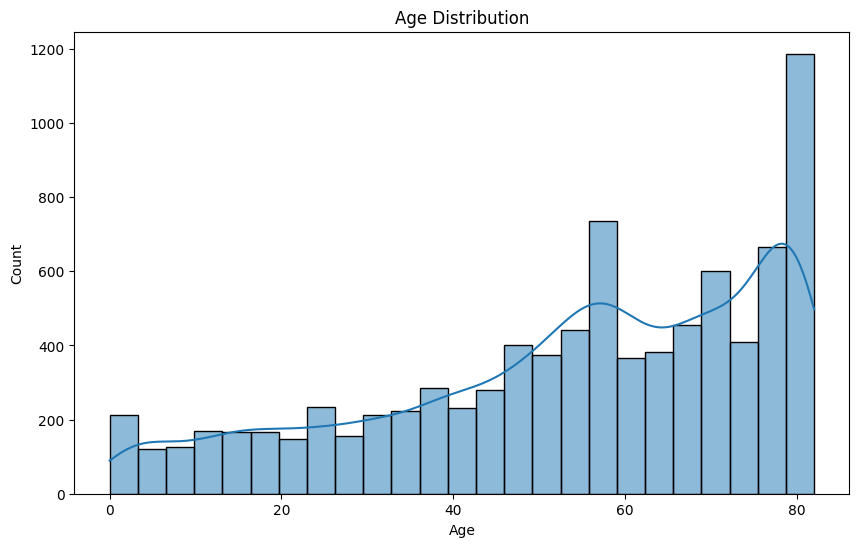

In [33]:
# Age Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

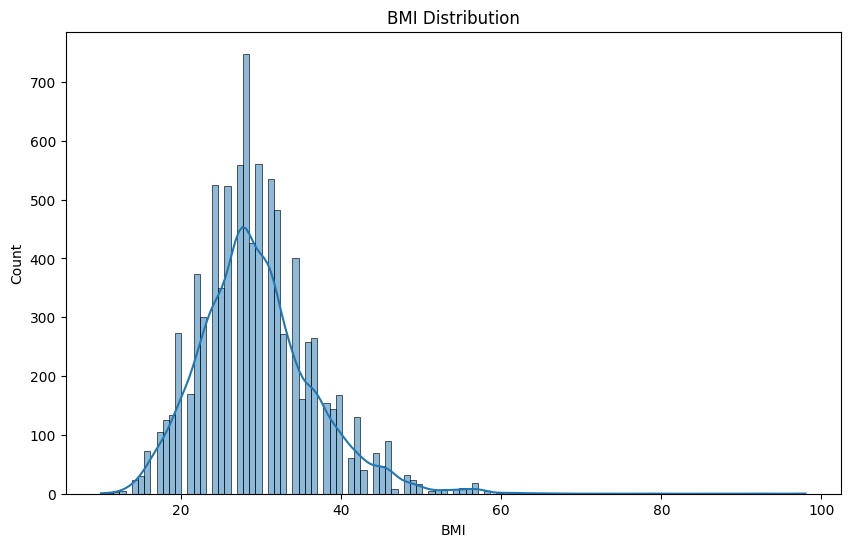

In [34]:
# BMI Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

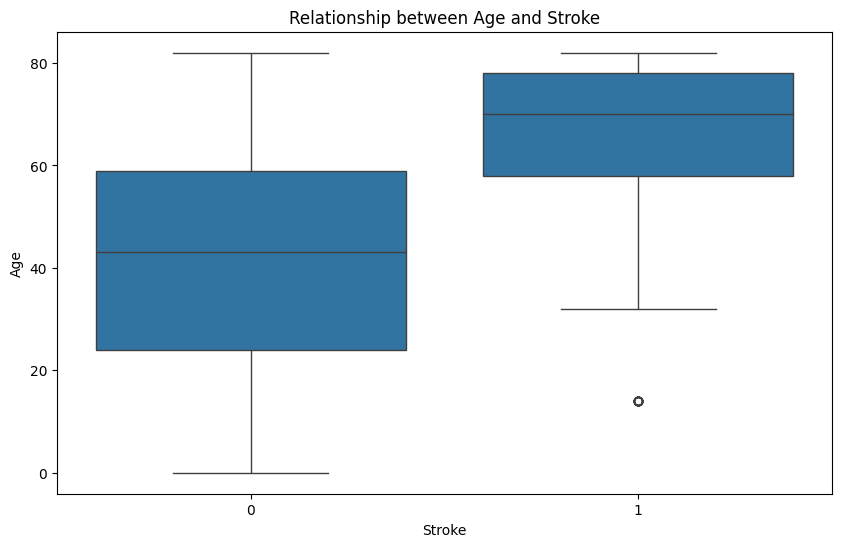

In [35]:
# Relationship between Age and Stroke

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stroke', y='Age', data=data)
plt.title('Relationship between Age and Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

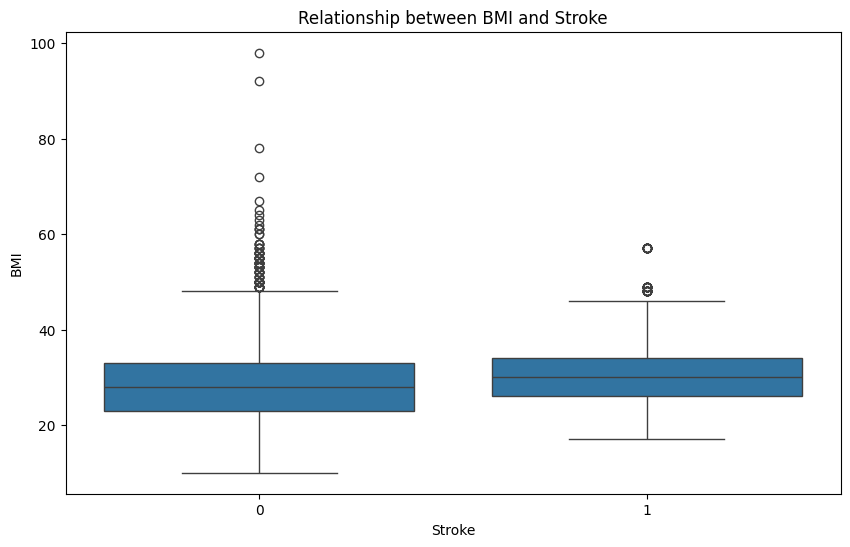

In [36]:
# Relationship between BMI and Stroke

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stroke', y='BMI', data=data)
plt.title('Relationship between BMI and Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

In [37]:
# Splitting data into features (X) and target variable (Y)

X = data.drop(['ID', 'Stroke'], axis=1)
y = data['Stroke']

In [38]:
print("Features (X):")
X.head()

Features (X):


,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Residence_Type,Avg_Glucose_Level,BMI,Work_Type_Govt_job,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Smoking_Status_Unknown,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
102,0,74,0,0,1,0,232,35,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
179,1,81,0,0,1,1,213,26,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
92,0,57,0,0,0,1,68,38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14,0,79,0,1,1,1,214,28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
106,0,50,1,0,1,0,73,30,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# Display the target variable (y)

print("Target Variable (y):")
y.head()

Target Variable (y):


102    1
179    1
92     1
14     1
106    1
Name: Stroke, dtype: int64

In [40]:
##### Modelling

In [41]:
# Data split: 80% Training set, 15% Testing set, and 5% Validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

In [42]:
#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
# Training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Making prediction for testing test

y_pred = logreg.predict(X_test)

In [46]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(cm)

print("Logistic Regression:")
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

[[544 173]
 [121 474]]
Logistic Regression:
True Positives (TP): 474
True Negatives (TN): 544
False Positives (FP): 173
False Negatives (FN): 121


In [47]:
# Evaluation

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

print("Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Logistic Regression:
Accuracy: 0.7759146341463414
Precision: 0.732612055641422
Recall: 0.7966386554621848
F1-score: 0.7632850241545893
AUC-ROC: 0.8536807191495844


In [48]:
# Validation set

y_val_pred = logreg.predict(X_val)

In [49]:
# Evaluation for the validation set

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val, logreg.predict_proba(X_val)[:, 1])

print("Validation Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1-score:", f1_val)
print("AUC-ROC:", auc_roc_val)

Validation Metrics:
Accuracy: 0.7648401826484018
Precision: 0.7511111111111111
Recall: 0.7824074074074074
F1-score: 0.7664399092970522
AUC-ROC: 0.8353144811478146


In [50]:
from sklearn.model_selection import GridSearchCV

# hyperparameter grid

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# The GridSearchCV object

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Performing grid search

grid_search.fit(X_train, y_train)

# The best model and its hyperparameters

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [51]:
# Creating a new logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear')

# Training model on the training set
best_logreg.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [52]:
# Making predictions on the validation set

y_val_pred = best_logreg.predict(X_val)

# Evaluation metrics for the validation set

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val, best_logreg.predict_proba(X_val)[:, 1])

print("Validation Metrics (Best Model):")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1-score:", f1_val)
print("AUC-ROC:", auc_roc_val)

Validation Metrics (Best Model):
Accuracy: 0.769406392694064
Precision: 0.7533039647577092
Recall: 0.7916666666666666
F1-score: 0.7720090293453724
AUC-ROC: 0.8344177510844177


In [53]:
# Making predictions on the testing set

y_test_pred = best_logreg.predict(X_test)

# Evaluation metrics for the testing set

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])

print("Testing Metrics (Best Model):")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("AUC-ROC:", auc_roc_test)

Testing Metrics (Best Model):
Accuracy: 0.7766768292682927
Precision: 0.7323076923076923
Recall: 0.8
F1-score: 0.7646586345381526
AUC-ROC: 0.8539432509405436


In [54]:
#### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
# Making predictions on the testing set

dt_y_pred = dt_classifier.predict(X_test)

In [57]:
# Evaluation

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_auc_roc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
dt_cm = confusion_matrix(y_test, dt_y_pred)

print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("AUC-ROC:", dt_auc_roc)
print("Confusion Matrix:")
print(dt_cm)

Decision Tree Classifier:
Accuracy: 0.9664634146341463
Precision: 0.9311424100156495
Recall: 1.0
F1-score: 0.9643435980551054
AUC-ROC: 0.9693165969316596
Confusion Matrix:
[[673  44]
 [  0 595]]


In [58]:
# Validation

dt_y_val_pred = dt_classifier.predict(X_val)
dt_accuracy_val = accuracy_score(y_val, dt_y_val_pred)
dt_precision_val = precision_score(y_val, dt_y_val_pred)
dt_recall_val = recall_score(y_val, dt_y_val_pred)
dt_f1_val = f1_score(y_val, dt_y_val_pred)
dt_auc_roc_val = roc_auc_score(y_val, dt_classifier.predict_proba(X_val)[:, 1])
dt_cm_val = confusion_matrix(y_val, dt_y_val_pred)

print("Decision Tree Classifier - Validation:")
print("Accuracy:", dt_accuracy_val)
print("Precision:", dt_precision_val)
print("Recall:", dt_recall_val)
print("F1-score:", dt_f1_val)
print("AUC-ROC:", dt_auc_roc_val)
print("Confusion Matrix:")
print(dt_cm_val)

Decision Tree Classifier - Validation:
Accuracy: 0.9863013698630136
Precision: 0.972972972972973
Recall: 1.0
F1-score: 0.9863013698630136
AUC-ROC: 0.9864864864864865
Confusion Matrix:
[[216   6]
 [  0 216]]


In [59]:
#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Making predictions on the testing set

rf_y_pred = rf_classifier.predict(X_test)

In [62]:
# Confusion matrix

rf_cm = confusion_matrix(y_test, rf_y_pred)
tn, fp, fn, tp = rf_cm.ravel()
print(rf_cm)

print("Random Forest:")
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

TPR = tp / (tp + fn)
FNR = fn / (tp + fn)
NPV = tn / (tn + fn)

print("FNR:", FNR)
print("True Positive Rate (TPR):", TPR)
print("Negative Predictive Value (NPV):", NPV)

[[705  12]
 [  0 595]]
Random Forest:
True Positives (TP): 595
True Negatives (TN): 705
False Positives (FP): 12
False Negatives (FN): 0
FNR: 0.0
True Positive Rate (TPR): 1.0
Negative Predictive Value (NPV): 1.0


In [63]:
# Evaluation

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_auc_roc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("AUC-ROC:", rf_auc_roc)

Random Forest Classifier:
Accuracy: 0.9908536585365854
Precision: 0.9802306425041186
Recall: 1.0
F1-score: 0.9900166389351082
AUC-ROC: 1.0


In [64]:
# Making predictions on the validation set

rf_y_val_pred = rf_classifier.predict(X_val)

rf_accuracy_val = accuracy_score(y_val, rf_y_val_pred)
rf_precision_val = precision_score(y_val, rf_y_val_pred)
rf_recall_val = recall_score(y_val, rf_y_val_pred)
rf_f1_val = f1_score(y_val, rf_y_val_pred)
rf_auc_roc_val = roc_auc_score(y_val, rf_classifier.predict_proba(X_val)[:, 1])

print("Random Forest Classifier - Validation Metrics:")
print("Accuracy:", rf_accuracy_val)
print("Precision:", rf_precision_val)
print("Recall:", rf_recall_val)
print("F1-score:", rf_f1_val)
print("AUC-ROC:", rf_auc_roc_val)

Random Forest Classifier - Validation Metrics:
Accuracy: 0.997716894977169
Precision: 0.9953917050691244
Recall: 1.0
F1-score: 0.9976905311778291
AUC-ROC: 1.0


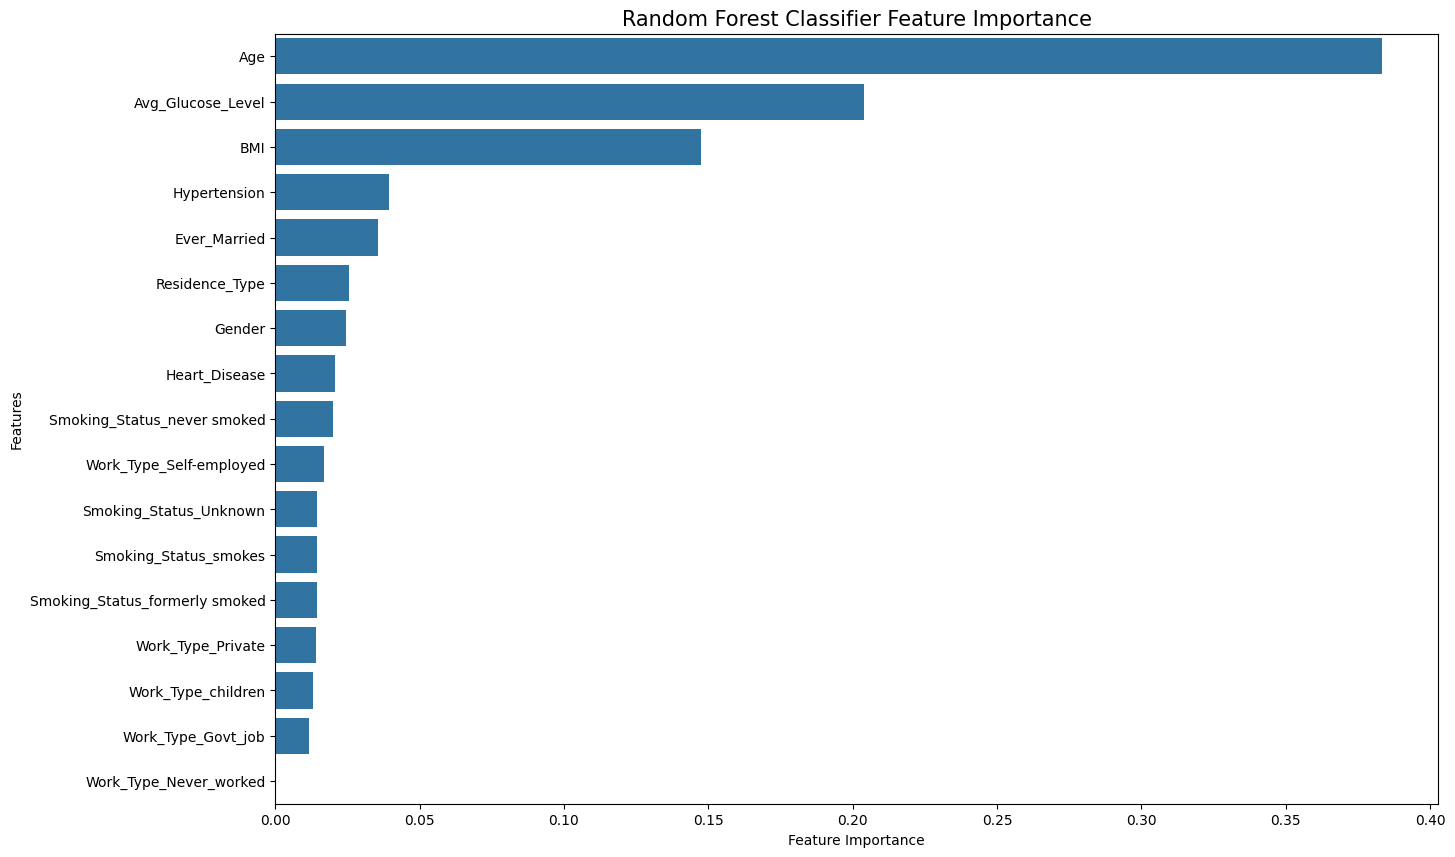

In [65]:
# Calculating features that are significant 

importances = pd.DataFrame(rf_classifier.feature_importances_, columns=['importance'], index=X_train.columns)
importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)
plt.show()

In [66]:
#### Gradient Boosting Classifier

In [67]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [68]:
# Making predictions on the testing set

gb_y_pred = gb_classifier.predict(X_test)

In [69]:
# Confusion matrix

gb_cm = confusion_matrix(y_test, gb_y_pred)
tn, fp, fn, tp = gb_cm.ravel()

print(gb_cm)

print("Gradient Boosting Classifier:")
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

[[573 144]
 [ 50 545]]
Gradient Boosting Classifier:
True Positives (TP): 545
True Negatives (TN): 573
False Positives (FP): 144
False Negatives (FN): 50


In [70]:
# Evaluation

gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)
gb_auc_roc = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])

print("Gradient Boosting Classifier:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-score:", gb_f1)
print("AUC-ROC:", gb_auc_roc)

Gradient Boosting Classifier:
Accuracy: 0.8521341463414634
Precision: 0.7910014513788098
Recall: 0.9159663865546218
F1-score: 0.8489096573208723
AUC-ROC: 0.9170012774984471


In [71]:
# Making predictions on the validation set

gb_y_val_pred = gb_classifier.predict(X_val)

gb_accuracy_val = accuracy_score(y_val, gb_y_val_pred)
gb_precision_val = precision_score(y_val, gb_y_val_pred)
gb_recall_val = recall_score(y_val, gb_y_val_pred)
gb_f1_val = f1_score(y_val, gb_y_val_pred)
gb_auc_roc_val = roc_auc_score(y_val, gb_classifier.predict_proba(X_val)[:, 1])

print("Gradient Boosting Classifier - Validation Metrics:")
print("Accuracy:", gb_accuracy_val)
print("Precision:", gb_precision_val)
print("Recall:", gb_recall_val)
print("F1-score:", gb_f1_val)
print("AUC-ROC:", gb_auc_roc_val)

Gradient Boosting Classifier - Validation Metrics:
Accuracy: 0.8333333333333334
Precision: 0.7942386831275721
Recall: 0.8935185185185185
F1-score: 0.840958605664488
AUC-ROC: 0.9097013680347013


In [72]:
### SVM Classifier

In [73]:
svm_classifier = SVC(kernel='rbf', random_state=42, probability=True)
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [74]:
# Making predictions on the testing set

svm_y_pred = svm_classifier.predict(X_test)

In [75]:
# Evaluation

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_auc_roc = roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:, 1])
svm_cm = confusion_matrix(y_test, svm_y_pred)

print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("AUC-ROC:", svm_auc_roc)
print("Confusion Matrix:")
print(svm_cm)

SVM Classifier:
Accuracy: 0.7560975609756098
Precision: 0.7043090638930164
Recall: 0.7966386554621848
F1-score: 0.7476340694006309
AUC-ROC: 0.8432380483574183
Confusion Matrix:
[[518 199]
 [121 474]]


In [87]:
# Validation

svm_y_val_pred = svm_classifier.predict(X_val)
svm_accuracy_val = accuracy_score(y_val, svm_y_val_pred)
svm_precision_val = precision_score(y_val, svm_y_val_pred)
svm_recall_val = recall_score(y_val, svm_y_val_pred)
svm_f1_val = f1_score(y_val, svm_y_val_pred)
svm_auc_roc_val = roc_auc_score(y_val, svm_classifier.predict_proba(X_val)[:, 1])
svm_cm_val = confusion_matrix(y_val, svm_y_val_pred)

print("SVM Classifier - Validation:")
print("Accuracy:", svm_accuracy_val)
print("Precision:", svm_precision_val)
print("Recall:", svm_recall_val)
print("F1-score:", svm_f1_val)
print("AUC-ROC:", svm_auc_roc_val)
print("Confusion Matrix:")
print(svm_cm_val)

SVM Classifier - Validation:
Accuracy: 0.7511415525114156
Precision: 0.7316017316017316
Recall: 0.7824074074074074
F1-score: 0.756152125279642
AUC-ROC: 0.8274003169836502
Confusion Matrix:
[[160  62]
 [ 47 169]]


In [88]:
# Checking predictions

for value in range(0,209):
    y_pred = rf_classifier.predict([df.iloc[value].values])
    y_real=fd.iloc[value]
    print("y_pred: " + str(y_pred) + " y_real: " + str(y_real))


y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1] y_real: 1
y_pred: [1